In [78]:
import joblib                             # For saving and loading ML models
import numpy as np                        # For numerical operations
import pandas as pd                       # For data manipulation and analysis
import seaborn as sns                     # For data visualization (built on matplotlib)
import matplotlib.pyplot as plt           # For plotting data

from sklearn.preprocessing import LabelEncoder                # For encoding categorical features
from sklearn.ensemble import RandomForestRegressor            # Random Forest model for regression
from sklearn.model_selection import train_test_split          # For splitting dataset into train and test sets
from sklearn.model_selection import RandomizedSearchCV        # For hyperparameter tuning with cross-validation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluating model performance


In [22]:
df = pd.read_csv(r"C:\Users\Aiman Khan\OneDrive\Desktop\ed\3ae033f50fa345051652.csv", delimiter=',')
df

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19
...,...,...,...,...,...,...,...,...,...,...
20814,January 31 2023,Rockingham,NH,Passenger,1,0,1,14,15,6.67
20815,July 31 2020,Carson City,NV,Passenger,1,0,1,10,11,9.09
20816,February 28 2022,Island,WA,Passenger,744,350,"1,094","62,257","63,351",1.73
20817,December 31 2020,San Diego,CA,Passenger,14,2,16,"2,724","2,740",0.58


In [24]:
print("Dataset Shape",df.shape)

Dataset Shape (20819, 10)


In [26]:
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [30]:
df.isnull()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20814,False,False,False,False,False,False,False,False,False,False
20815,False,False,False,False,False,False,False,False,False,False
20816,False,False,False,False,False,False,False,False,False,False
20817,False,False,False,False,False,False,False,False,False,False


In [32]:
Q1 = df['Percent Electric Vehicles'].quantile(0.25)  # 25th percentile
Q3 = df['Percent Electric Vehicles'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                                        # Interquartile range


In [34]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [36]:
print('lower_bound:', lower_bound)
print('upper_bound:', upper_bound)


lower_bound: -3.5174999999999996
upper_bound: 6.9025


In [38]:
outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | 
              (df['Percent Electric Vehicles'] > upper_bound)]


In [40]:
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])


Number of outliers in 'Percent Electric Vehicles': 2476


In [42]:

# Convert the 'Date' column to actual datetime objects, invalid ones become NaT
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove rows where 'Date' conversion failed
df = df[df['Date'].notnull()]

# Remove rows where the target (EV Total) is missing
df = df[df['Electric Vehicle (EV) Total'].notnull()]

# Fill missing values in 'County' and 'State' with 'Unknown'
df['County'] = df['County'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

# Confirm that missing values are handled
print("Missing after fill:")
print(df[['County', 'State']].isnull().sum())

# Preview the cleaned data
df.head()


Missing after fill:
County    0
State     0
dtype: int64


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,2022-12-31,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,2020-01-31,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,2022-06-30,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,2021-07-31,Douglas,CO,Passenger,0,1,1,83,84,1.19


Number of outliers in 'Percent Electric Vehicles': 2476


In [48]:
df['Percent Electric Vehicles'] = np.where(
    df['Percent Electric Vehicles'] > upper_bound, upper_bound,
    np.where(df['Percent Electric Vehicles'] < lower_bound, lower_bound, df['Percent Electric Vehicles'])
)


In [51]:
outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)]
print("Number of outliers in 'Percent Electric Vehicles':", outliers.shape[0])


Number of outliers in 'Percent Electric Vehicles': 0


In [55]:
print(df.columns.tolist())


['Date', 'County', 'State', 'Vehicle Primary Use', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles']


In [57]:
df.columns = df.columns.str.strip()


In [65]:
import difflib

target = 'Plug-in Hybrid Electric Vehicles (PHEVs)'
matches = difflib.get_close_matches(target, df.columns, n=5)
print("Closest matches found:", matches)



Closest matches found: ['Plug-In Hybrid Electric Vehicles (PHEVs)', 'Battery Electric Vehicles (BEVs)', 'Electric Vehicle (EV) Total', 'Percent Electric Vehicles']


In [82]:
import pandas as pd
import difflib

# Step 1: View actual column names
print("🔎 Actual columns in your DataFrame:")
for col in df.columns:
    print(f"- {col}")

# Step 2: Strip whitespace from column names (helps avoid hidden errors)
df.columns = df.columns.str.strip()

# Step 3: Define your target column names
intended_cols = [
    'Battery Electric Vehicles (BEVs)',
    'Plug-in Hybrid Electric Vehicles (PHEVs)',
    'Electric Vehicle (EV) Total',
    'Non-Electric Vehicle Total',
    'Total Vehicles',
    'Percent Electric Vehicles'
]

# Step 4: Match real column names (suggest similar if not found)
cols_to_convert = []

print("\n🔄 Matching columns:")
for intended in intended_cols:
    if intended in df.columns:
        cols_to_convert.append(intended)
    else:
        close = difflib.get_close_matches(intended, df.columns, n=1, cutoff=0.5)
        if close:
            print(f"✔️ Using closest match for '{intended}': {close[0]}")
            cols_to_convert.append(close[0])
        else:
            print(f"❌ Column not found: '{intended}' — No close match")

# Step 5: Convert matched columns to numeric
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 6: Describe the numeric columns
print("\n📊 Descriptive statistics for selected columns:")
print(df[cols_to_convert].describe())


🔎 Actual columns in your DataFrame:
- Date
- County
- State
- Vehicle Primary Use
- Battery Electric Vehicles (BEVs)
- Plug-In Hybrid Electric Vehicles (PHEVs)
- Electric Vehicle (EV) Total
- Non-Electric Vehicle Total
- Total Vehicles
- Percent Electric Vehicles

🔄 Matching columns:
✔️ Using closest match for 'Plug-in Hybrid Electric Vehicles (PHEVs)': Plug-In Hybrid Electric Vehicles (PHEVs)

📊 Descriptive statistics for selected columns:
       Battery Electric Vehicles (BEVs)  \
count                      20266.000000   
mean                          25.855176   
std                          102.004224   
min                            0.000000   
25%                            0.000000   
50%                            1.000000   
75%                            2.000000   
max                          999.000000   

       Plug-In Hybrid Electric Vehicles (PHEVs)  Electric Vehicle (EV) Total  \
count                              20468.000000                 20119.000000   
mean   

In [84]:
top_counties = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(3)
bottom_counties = df.groupby('County')['Electric Vehicle (EV) Total'].sum().sort_values().head(3)

print("Top 3 Counties:\n", top_counties)
print("\nBottom 3 Counties:\n", bottom_counties)


Top 3 Counties:
 County
Clallam      39839.0
Jefferson    39683.0
San Juan     39309.0
Name: Electric Vehicle (EV) Total, dtype: float64

Bottom 3 Counties:
 County
Brown         1.0
Hood River    1.0
Union         1.0
Name: Electric Vehicle (EV) Total, dtype: float64


C:\Users\Aiman Khan\AppData\Local\Temp\ipykernel_10652\83339955.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\Aiman Khan\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


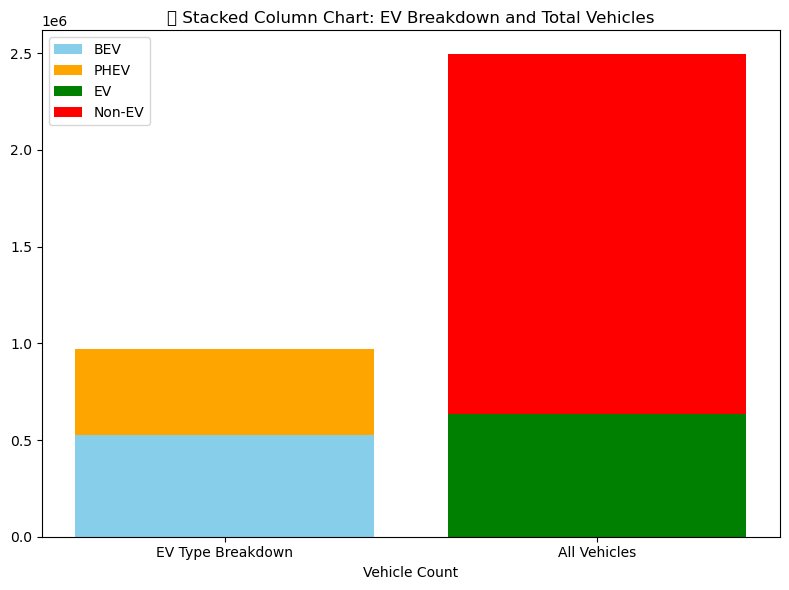

In [86]:
import matplotlib.pyplot as plt

# Step 1: Total sums for stacked column chart
bev_total = df['Battery Electric Vehicles (BEVs)'].sum()
phev_total = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()
ev_total = df['Electric Vehicle (EV) Total'].sum()
non_ev_total = df['Non-Electric Vehicle Total'].sum()
all_total = df['Total Vehicles'].sum()

# Step 2: Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Step 3: Plot stacked bars for EV types
ax.bar('EV Type Breakdown', bev_total, label='BEV', color='skyblue')
ax.bar('EV Type Breakdown', phev_total, bottom=bev_total, label='PHEV', color='orange')

# Step 4: Plot stacked bars for total vehicle categories
ax.bar('All Vehicles', ev_total, label='EV', color='green')
ax.bar('All Vehicles', non_ev_total, bottom=ev_total, label='Non-EV', color='red')

# Step 5: Final plot touches
ax.set_xlabel('Vehicle Count')
ax.set_title('📊 Stacked Column Chart: EV Breakdown and Total Vehicles')
ax.legend()
plt.tight_layout()
plt.show()


In [88]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['numeric_date'] = df['Date'].dt.year * 12 + df['Date'].dt.month


In [91]:
le = LabelEncoder()
df['county_encoded'] = le.fit_transform(df['County'])


In [94]:
df = df.sort_values(['County', 'Date'])


In [96]:
df['months_since_start'] = df.groupby('County').cumcount()


In [98]:
for lag in [1, 2, 3]:
    df[f'ev_total_lag{lag}'] = df.groupby('County')['Electric Vehicle (EV) Total'].shift(lag)


In [100]:
df['ev_total_roll_mean_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                               .transform(lambda x: x.shift(1).rolling(3).mean())


In [102]:
df['ev_total_pct_change_1'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                .pct_change(periods=1, fill_method=None)

df['ev_total_pct_change_3'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                                .pct_change(periods=3, fill_method=None)


In [104]:
df['ev_total_pct_change_1'] = df['ev_total_pct_change_1'].replace([np.inf, -np.inf, np.nan], 0)
df['ev_total_pct_change_3'] = df['ev_total_pct_change_3'].replace([np.inf, -np.inf, np.nan], 0)


In [106]:
df = df.dropna().reset_index(drop=True)


In [113]:
df.to_csv(r"C:\Users\Aiman Khan\OneDrive\Desktop\ed\3ae033f50fa345051652.csv", index=False)


In [115]:
df.head()


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,...,month,numeric_date,county_encoded,months_since_start,ev_total_lag1,ev_total_lag2,ev_total_lag3,ev_total_roll_mean_3,ev_total_pct_change_1,ev_total_pct_change_3
0,2018-03-31,Ada,ID,Passenger,0.0,2.0,2.0,346.0,348.0,0.57,...,3,24219,0,3,2.0,1.0,1.0,1.333333,0.0,1.0
1,2018-04-30,Ada,ID,Passenger,0.0,2.0,2.0,341.0,343.0,0.58,...,4,24220,0,4,2.0,2.0,1.0,1.666667,0.0,1.0
2,2018-05-31,Ada,ID,Passenger,0.0,2.0,2.0,341.0,343.0,0.58,...,5,24221,0,5,2.0,2.0,2.0,2.000000,0.0,0.0
3,2018-06-30,Ada,ID,Passenger,0.0,2.0,2.0,332.0,334.0,0.60,...,6,24222,0,6,2.0,2.0,2.0,2.000000,0.0,0.0
4,2018-07-31,Ada,ID,Passenger,0.0,2.0,2.0,329.0,331.0,0.60,...,7,24223,0,7,2.0,2.0,2.0,2.000000,0.0,0.0


In [125]:
features = [
    'months_since_start',
    'county_encoded',
    'ev_total_lag1',
    'ev_total_lag2',
    'ev_total_lag3',
    'ev_total_roll_mean_3',
    'ev_total_pct_change_1',
    'ev_total_pct_change_3',
    'ev_growth_slope',
]


In [127]:
target = 'Electric Vehicle (EV) Total'



In [129]:
# Example: Linear slope over last 3 months (optional logic)
from sklearn.linear_model import LinearRegression
import numpy as np

def compute_growth_slope(x):
    if x.size < 3:
        return np.nan
    X = np.arange(3).reshape(-1, 1)
    y = x.values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    return model.coef_[0][0]

df['ev_growth_slope'] = df.groupby('County')['Electric Vehicle (EV) Total'] \
                          .transform(lambda x: x.shift(1).rolling(3).apply(compute_growth_slope, raw=False))


In [130]:
X = df[features]
y = df[target]


In [134]:
X.head()
X.shape


(13099, 9)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.1)


In [141]:
y_test.head()

11789    1.0
11790    1.0
11791    1.0
11792    1.0
11793    1.0
Name: Electric Vehicle (EV) Total, dtype: float64

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 15}
RMSE: 0.05949276413406913
R² Score: 0.9983085436201452


C:\Users\Aiman Khan\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


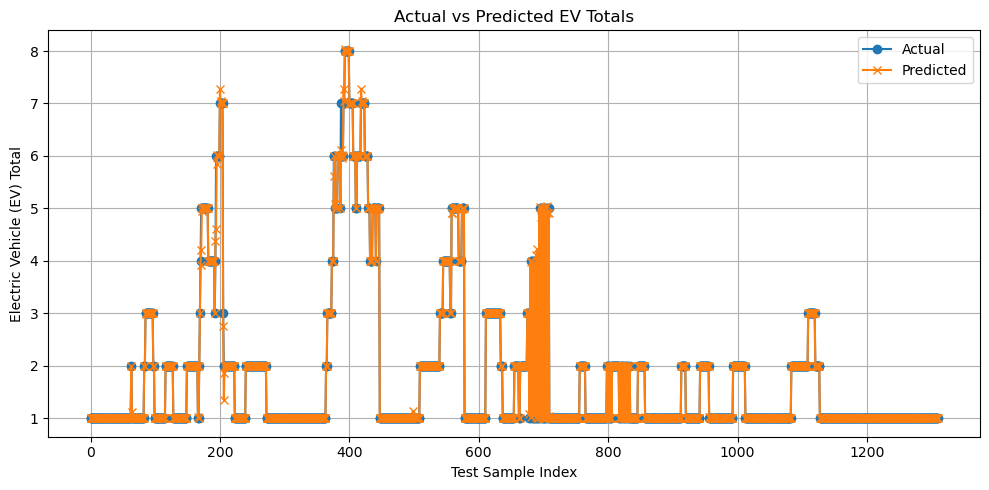

In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Define hyperparameter grid
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2', None]
}

# Base model
rf = RandomForestRegressor(random_state=42)

# Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit on training data
random_search.fit(X_train, y_train)

# Best model and its parameters
model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R² Score:", r2)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted EV Totals")
plt.xlabel("Test Sample Index")
plt.ylabel("Electric Vehicle (EV) Total")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [149]:
y_pred=model.predict(X_test)


In [151]:
import pandas as pd

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual EV Count': y_test.values,
    'Predicted EV Count': y_pred
})

# Round predicted values for readability
comparison_df['Predicted EV Count'] = comparison_df['Predicted EV Count'].round(2)

# Optionally reset index
comparison_df.reset_index(drop=True, inplace=True)

# Show the first 10 rows
print(comparison_df.head(10))


   Actual EV Count  Predicted EV Count
0              1.0                 1.0
1              1.0                 1.0
2              1.0                 1.0
3              1.0                 1.0
4              1.0                 1.0
5              1.0                 1.0
6              1.0                 1.0
7              1.0                 1.0
8              1.0                 1.0
9              1.0                 1.0


MAE: 0.01, RMSE: 0.06, R2 Score: 1.00


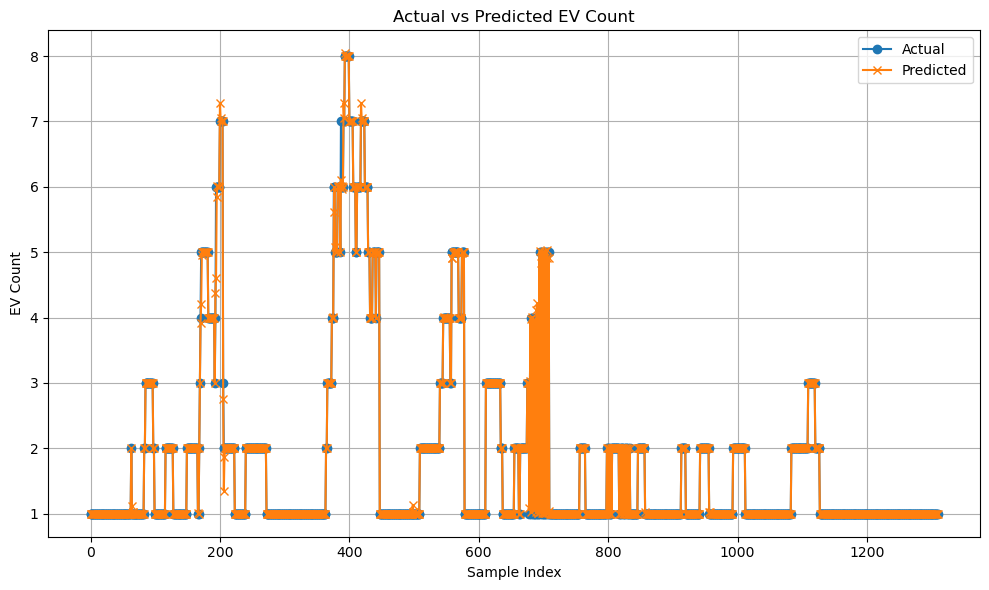

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define evaluation function
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2score = r2_score(y_true, y_pred)
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2score:.2f}")

# Run evaluation
evaluate(y_test, y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title("Actual vs Predicted EV Count")
plt.xlabel("Sample Index")
plt.ylabel("EV Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


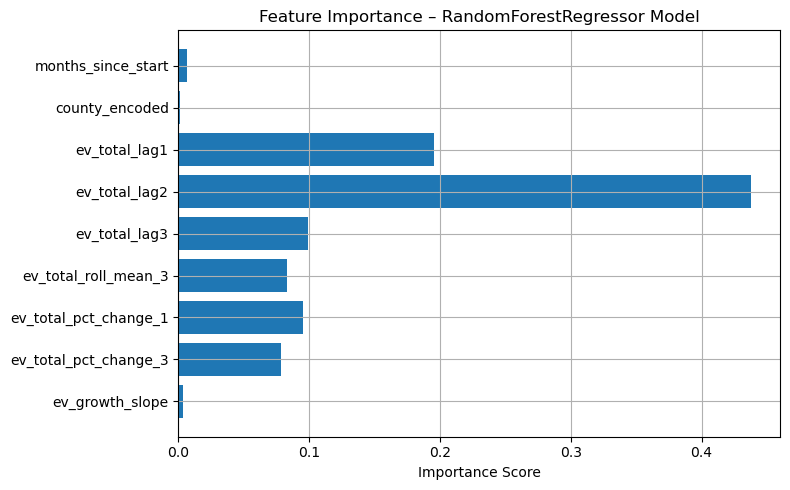

In [155]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel('Importance Score')
plt.title('Feature Importance – RandomForestRegressor Model')
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(True)
plt.tight_layout()
plt.show()


In [157]:
# Define features
featuresX = ['County', 'county_encoded']
countyX = df[featuresX]

# Print unique county values
print("List of unique counties:")
print(df['County'].dropna().unique())

# Print total number of unique counties
print("Total unique counties:", df['County'].nunique())


List of unique counties:
['Ada' 'Adams' 'Alameda' 'Albemarle' 'Alexandria' 'Allegheny' 'Allen'
 'Anchorage' 'Anne Arundel' 'Arapahoe' 'Arlington' 'Atlantic' 'Autauga'
 'Baltimore' 'Bartow' 'Beaufort' 'Bell' 'Bergen' 'Berkeley' 'Berkshire'
 'Bexar' 'Boone' 'Boulder' 'Bradley' 'Brevard' 'Broward' 'Bryan' 'Bucks'
 'Burlington' 'Caddo' 'Calvert' 'Camden' 'Canyon' 'Carroll' 'Carson City'
 'Cascade' 'Champaign' 'Charles' 'Charleston' 'Charlottesville'
 'Chesapeake' 'Clackamas' 'Clark' 'Clay' 'Clinton' 'Cobb' 'Cochise'
 'Collier' 'Collin' 'Columbia' 'Contra Costa' 'Cook' 'Coryell'
 'Cumberland' 'Currituck' 'Dakota' 'Dale' 'Dallas' 'Dane' 'Danville'
 'DeKalb' 'Denton' 'Denver' 'Deschutes' 'District of Columbia'
 'Dorchester' 'Douglas' 'DuPage' 'Duval' 'Eagle' 'Eau Claire' 'El Dorado'
 'El Paso' 'Escambia' 'Essex' 'Fairbanks North Star' 'Fairfax' 'Flathead'
 'Fort Bend' 'Franklin' 'Frederick' 'Fresno' 'Fulton' 'Galveston'
 'Garfield' 'Geary' 'Goochland' 'Greene' 'Guadalupe' 'Guilford' 'Gwinnett

County 'Kings' encoded as 116.


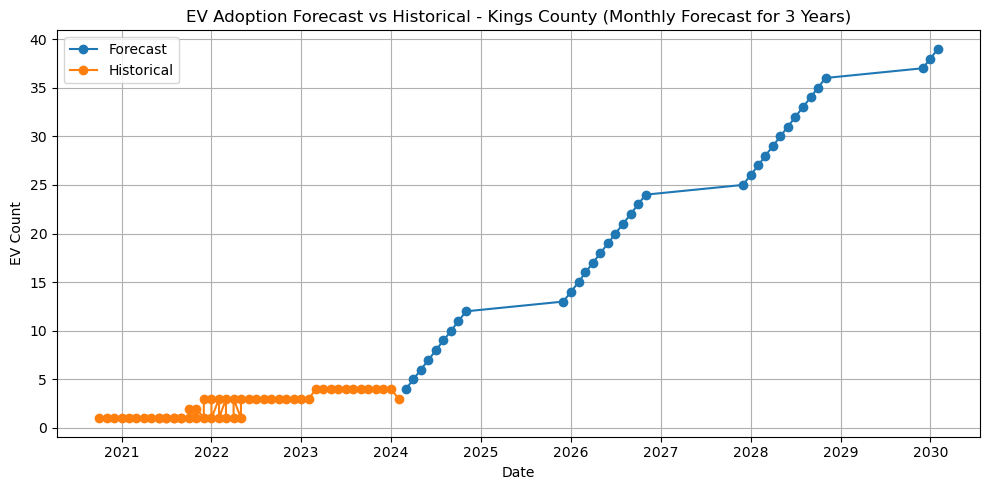

In [178]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\Aiman Khan\OneDrive\Desktop\ed\3ae033f50fa345051652.csv")  # Replace with your dataset filename

# Filter for a specific county
county = "Kings"

# Encode county
le = LabelEncoder()
df['county_encoded'] = le.fit_transform(df['County'])

try:
    county_code = le.transform([county])[0]
    print(f"County '{county}' encoded as {county_code}.")
except ValueError:
    print(f"Error: '{county}' not found in LabelEncoder.")
    exit()

# Filter historical data
county_df = df[df['county_encoded'] == county_code].sort_values("numeric_date")

if county_df.empty:
    print(f"Warning: No data found for county '{county}'.")
    exit()

# Prepare EV history
historical_ev = list(county_df['Electric Vehicle (EV) Total'].values[-6:])
cumulative_ev = list(np.cumsum(historical_ev))
slope_history = 1
months_since_start = county_df['months_since_start'].max()

historical = county_df[['year', 'month', 'numeric_date', 'Electric Vehicle (EV) Total', 'months_since_start']].copy()
historical['Source'] = 'Historical'
historical['Date'] = pd.to_datetime(historical[['year', 'month']].assign(day=1))

# Forecast next 36 months
latest_row = county_df.iloc[-1].copy()
future_rows = []

for i in range(36):
    latest_row = latest_row.copy()
    latest_row['months_since_start'] += 1
    latest_row['numeric_date'] += 1
    latest_row['Electric Vehicle (EV) Total'] += slope_history  # simple linear forecast
    latest_row['Source'] = 'Forecast'

    year = int(latest_row['year']) + (latest_row['month'] + 1) // 12
    month = (latest_row['month'] + 1) % 12 or 12
    latest_row['month'] = month
    latest_row['year'] = year
    latest_row['Date'] = pd.to_datetime({'year': [year], 'month': [month], 'day': [1]})[0]

    future_rows.append(latest_row.copy())

# Combine historical and forecast
forecast_df = pd.DataFrame(future_rows)
combined_df = pd.concat([historical, forecast_df], ignore_index=True)

# Plotting
plt.figure(figsize=(10, 5))
for label, grp in combined_df.groupby("Source"):
    plt.plot(grp["Date"], grp["Electric Vehicle (EV) Total"], marker='o', label=label)

plt.title(f"EV Adoption Forecast vs Historical - {county} County (Monthly Forecast for 3 Years)")
plt.xlabel("Date")
plt.ylabel("EV Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

forecast_horizon = 36
all_combined = []

unique_counties = df['County'].dropna().unique()

for county in unique_counties:
    try:
        county_code = le.transform([county])[0]
    except ValueError:
        continue

    county_df = df[df['county_encoded'] == county_code].sort_values('numeric_date')

    if county_df.empty or county_df.shape[0] < 6:
        continue

    county_df = county_df.copy()
    county_df['Cumulative EVs'] = county_df['Electric Vehicle (EV) Total'].cumsum()
    county_df['Date'] = pd.to_datetime(dict(year=county_df['year'], month=county_df['month'], day=1))
    historical = county_df[['Date', 'County', 'Cumulative EVs']].copy()

    last_date = historical['Date'].max()
    ev_series = list(county_df['Electric Vehicle (EV) Total'].values[-6:])
    cumulative_last = historical['Cumulative EVs'].iloc[-1]

    future_rows = []
    for i in range(forecast_horizon):
        if len(ev_series) < 3:
            break

        lag1, lag2, lag3 = ev_series[-1], ev_series[-2], ev_series[-3]
        roll_mean = np.mean([lag1, lag2, lag3])
        pct_change = ((lag1 - lag2) / lag2 + (lag1 - lag3) / lag3) / 2 if lag2 != 0 and lag3 != 0 else 0
        predicted_ev = max(roll_mean * (1 + pct_change), 0)
        cumulative_last += predicted_ev

        forecast_date = last_date + pd.DateOffset(months=i + 1)
        future_rows.append({
            'Date': forecast_date,
            'County': county,
            'Cumulative EVs': cumulative_last
        })

        ev_series.append(predicted_ev)

    future_df = pd.DataFrame(future_rows)
    full_line = pd.concat([historical, future_df], ignore_index=True)
    all_combined.append(full_line)

# Get top 5 counties by final EV count
final_counts = [df_.iloc[-1] for df_ in all_combined]
final_df = pd.DataFrame(final_counts)
top_5 = final_df.sort_values('Cumulative EVs', ascending=False).head(5)['County'].tolist()

# Plot single line per county
plt.figure(figsize=(14, 7))

for df_ in all_combined:
    county = df_['County'].iloc[0]
    if county in top_5:
        plt.plot(df_['Date'], df_['Cumulative EVs'], label=county, linewidth=2)

# Beautify the plot
plt.title("Top 5 Counties: Cumulative EVs Over Time (Historical + Forecast)", fontsize=15)
plt.xlabel("Date")
plt.ylabel("Cumulative EV Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
